First 5 rows of the dataset:
   purchase_amount  review_score  days_to_delivery returned
0       687.011818      3.778615                 4       no
1       325.972093      2.458683                 1      yes
2       685.382724      3.954024                 7       no
3       291.100577      3.666468                14      yes
4       209.806672      1.478248                 2       no

Checking for missing values:
purchase_amount     0
review_score        0
days_to_delivery    0
returned            0
dtype: int64

Confusion Matrix:
[[3 6]
 [3 8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         9
           1       0.57      0.73      0.64        11

    accuracy                           0.55        20
   macro avg       0.54      0.53      0.52        20
weighted avg       0.54      0.55      0.53        20


Accuracy Score:
0.55


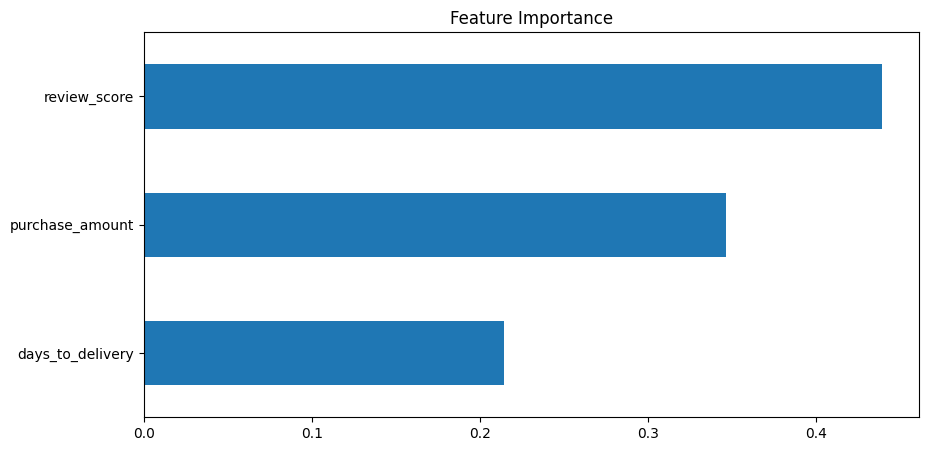

In [5]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the dataset
df = pd.read_csv('/content/product_return.csv')  # Upload the CSV file to Colab first
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Data Preprocessing
print("\nChecking for missing values:")
print(df.isnull().sum())

# Fill or drop missing values if any (example below):
df = df.dropna()

# Step 4: Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 5: Define features and target
X = df.drop('returned', axis=1)
y = df['returned']

# Step 6: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the model using Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate the model
y_pred = model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Step 9: Feature importance plot
plt.figure(figsize=(10, 5))
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.show()
